Saving harga Bitcoin.csv to harga Bitcoin.csv
RMSE: 1737.98


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/

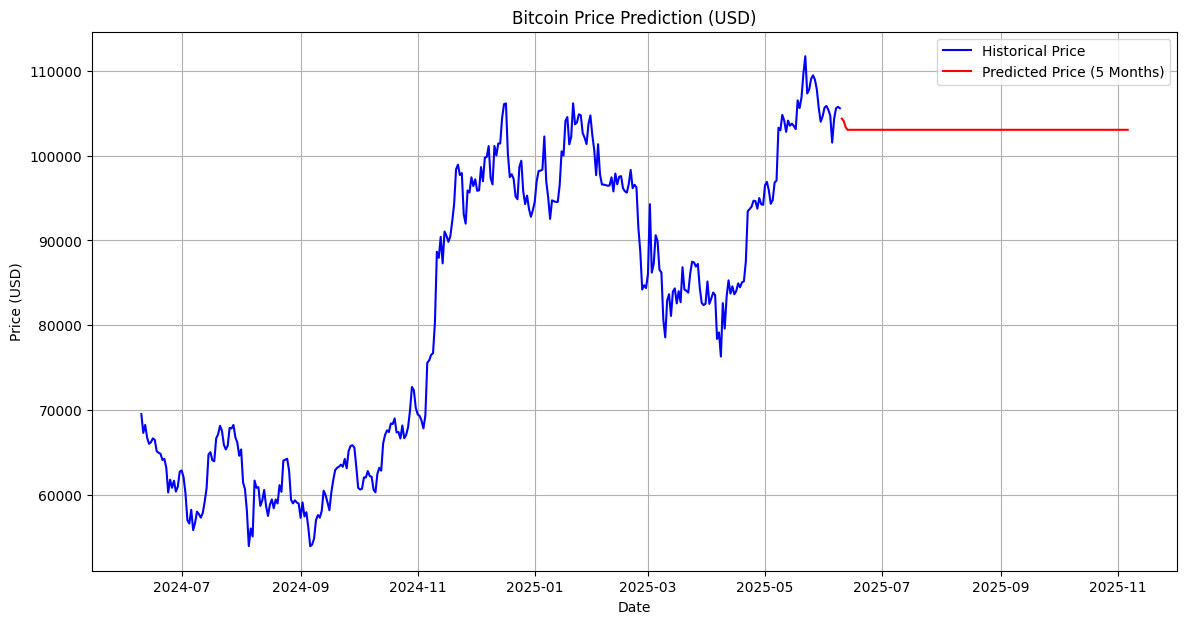


📊 Tabel Harga Historis:


,Price,Open,High,Low,Vol.,Change %,Price_Lag1
Date,,,,,,,
2025-06-05,101521.9,104690.6,105914.4,100421.1,73530.0,-3.03,104695.6
2025-06-06,104308.3,101524.1,105306.5,101127.6,61970.0,2.74,101521.9
2025-06-07,105564.2,104308.3,105911.7,103911.0,32390.0,1.20,104308.3
2025-06-08,105739.6,105564.2,106449.3,105011.6,29110.0,0.17,105564.2
2025-06-09,105568.4,105739.6,105965.9,105333.3,34300.0,-0.16,105739.6



📈 Tabel Prediksi 5 Bulan ke Depan:


,Predicted_Price
Date,
2025-06-10,104350.556
2025-06-11,104070.496
2025-06-12,103362.302
2025-06-13,103030.545
2025-06-14,103033.195


from matplotlib import pyplot as plt
_df_2['Predicted_Price'].plot(kind='hist', bins=20, title='Predicted_Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Predicted_Price'].plot(kind='line', figsize=(8, 4), title='Predicted_Price')
plt.gca().spines[['top', 'right']].set_visible(False)

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from google.colab import files

# 1. Upload file CSV
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# 2. Preprocessing
df = pd.read_csv(file_name, sep=';')

# Bersihkan data
df['Date'] = pd.to_datetime(df['Date'])
df['Price'] = df['Price'].str.replace(',', '').astype(float)
df['Open'] = df['Open'].str.replace(',', '').astype(float)
df['High'] = df['High'].str.replace(',', '').astype(float)
df['Low'] = df['Low'].str.replace(',', '').astype(float)
df['Vol.'] = df['Vol.'].str.replace('K', '').astype(float) * 1000  # Convert "K" to numeric
df['Change %'] = df['Change %'].str.replace('%', '').astype(float)

df = df.sort_values('Date').set_index('Date')

# Buat fitur lag (harga 1 hari sebelumnya)
df['Price_Lag1'] = df['Price'].shift(1)
df = df.dropna()

# 3. Train Random Forest
X = df[['Price_Lag1', 'Open', 'High', 'Low', 'Vol.', 'Change %']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediksi untuk data testing
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

# 4. Prediksi 5 Bulan ke Depan (150 hari kalender)
future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=150, freq='D')
last_data = X.iloc[-1:].values
future_predictions = []

for _ in range(150):
    pred = model.predict(last_data)[0]
    future_predictions.append(pred)
    last_data = np.array([[pred, pred, pred, pred, df['Vol.'].iloc[-1], df['Change %'].iloc[-1]]])

future_df = pd.DataFrame({'Date': future_dates, 'Predicted_Price': future_predictions})
future_df.set_index('Date', inplace=True)

# 5. Visualisasi
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Price'], label='Historical Price', color='blue')
plt.plot(future_df.index, future_df['Predicted_Price'], label='Predicted Price (5 Months)', color='red')
plt.title('Bitcoin Price Prediction (USD)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

# 6. Tampilkan Tabel
print("\n📊 Tabel Harga Historis:")
display(df.tail())  # Menampilkan 5 data terakhir historis

print("\n📈 Tabel Prediksi 5 Bulan ke Depan:")
display(future_df.head())  # Menampilkan 5 prediksi pertama

# 7. Simpan hasil prediksi
df.to_csv('historical_data.csv')
future_df.to_csv('future_predictions.csv')
